## Final Project Submission

Please fill out:
* Student name:  Kennedy Murithi
* Student pace: self paced / part time / full time   A part time student
* Scheduled project review date/time: 
* Instructor name: Samuel Jane
* Blog post URL:


### Bussiness Problem

### Objectives

You will be able to:

*Be able to identify the features with strong relationship with the Housing prices.

*Perform a train-test split

*Prepare training and testing data for modeling

*Compare training and testing errors to determine if model is over or underfitting

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [6]:
# we change the date type from object to datetime
data['date']= pd.to_datetime(data['date'])

In [7]:
 ## we go on to drop the columns that we will not be using
data.drop(['date','id','sqft_living','bathrooms','long','lat','zipcode','sqft_basement'
           ,'sqft_lot','condition','waterfront', 'sqft_above'], axis= 1,inplace= True)

In [8]:
data.columns

Index(['price', 'bedrooms', 'floors', 'view', 'grade', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
data.shape

(21597, 9)

In [10]:
data.head()

,price,bedrooms,floors,view,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.0,0.0,7,1955,0.0,1340,5650
1,538000.0,3,2.0,0.0,7,1951,1991.0,1690,7639
2,180000.0,2,1.0,0.0,6,1933,NaN,2720,8062
3,604000.0,4,1.0,0.0,7,1965,0.0,1360,5000
4,510000.0,3,1.0,0.0,8,1987,0.0,1800,7503


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

#quickly explore the distribution and pairwise correlations between our features
#pd.plotting.scatter_matrix(new_data);


In [12]:
data.isna().sum()

price               0
bedrooms            0
floors              0
view               63
grade               0
yr_built            0
yr_renovated     3842
sqft_living15       0
sqft_lot15          0
dtype: int64

In [13]:
#Dropping the null entries in the view column
data.view.dropna(inplace=True)

In [14]:
# Filling in the null
data['yr_renovated'] = data['yr_renovated'].fillna(data['yr_renovated'].median())

In [15]:
# Checking for duplicated entries in the dataset
data.duplicated().sum()

23

In [16]:
# Investigating further due to the presence of duplicated values
data[data.duplicated(keep=False)]

,price,bedrooms,floors,view,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
547,259950.0,2,2.0,0.0,9,2008,0.0,1070,928
1231,208000.0,3,1.0,0.0,6,1960,0.0,1010,7420
2809,963990.0,4,2.0,0.0,9,2014,0.0,3830,6507
3946,550000.0,4,2.0,3.0,8,1936,1980.0,2520,14789
3947,550000.0,4,2.0,3.0,8,1936,1980.0,2520,14789
4348,259950.0,2,2.0,0.0,9,2008,0.0,1070,928
4965,568000.0,3,3.0,0.0,8,2008,0.0,1740,1280
6920,375000.0,3,3.0,0.0,8,2004,0.0,1330,1113
7644,510000.0,6,2.0,0.0,8,1980,0.0,2470,7561
8275,245000.0,2,1.0,0.0,6,1960,0.0,1220,1740


In [17]:
# Dropping the duplicates
data.drop_duplicates(inplace=True)

In [18]:
# Rechecking once again for any duplicated entries in the data
data[data.duplicated(keep=False)]

,price,bedrooms,floors,view,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21574 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21574 non-null  float64
 1   bedrooms       21574 non-null  int64  
 2   floors         21574 non-null  float64
 3   view           21511 non-null  float64
 4   grade          21574 non-null  int64  
 5   yr_built       21574 non-null  int64  
 6   yr_renovated   21574 non-null  float64
 7   sqft_living15  21574 non-null  int64  
 8   sqft_lot15     21574 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.6 MB


In [20]:
import seaborn as sns;sns.set_theme(style='darkgrid')
import numpy as np

### Plotting histograms for our columns

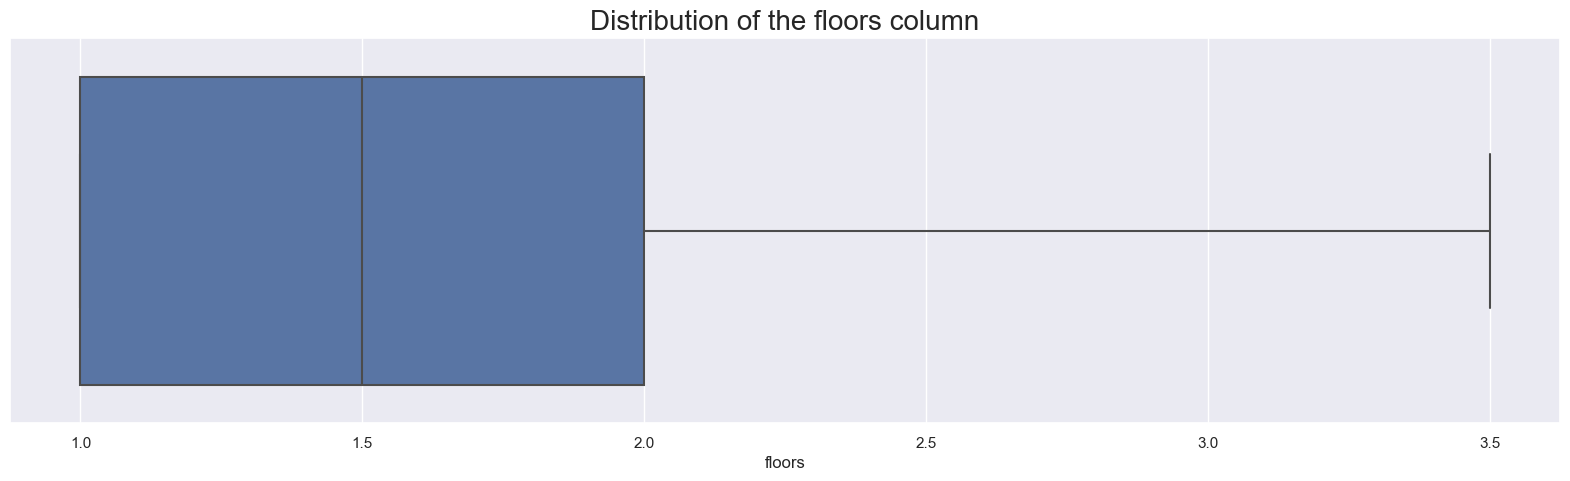

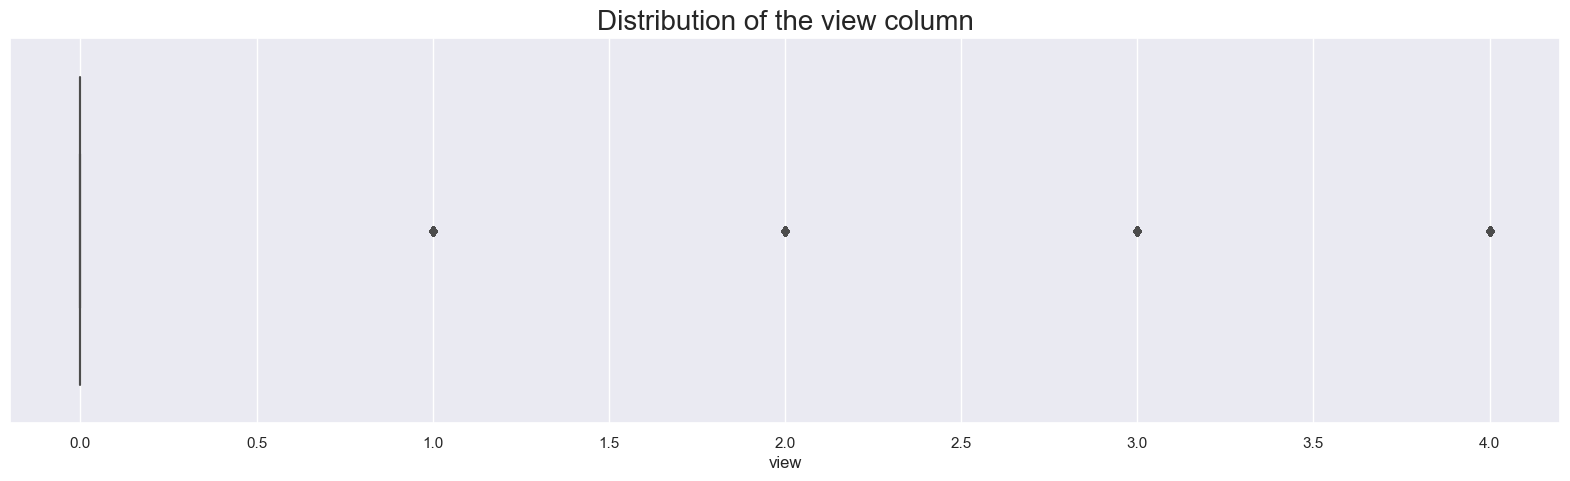

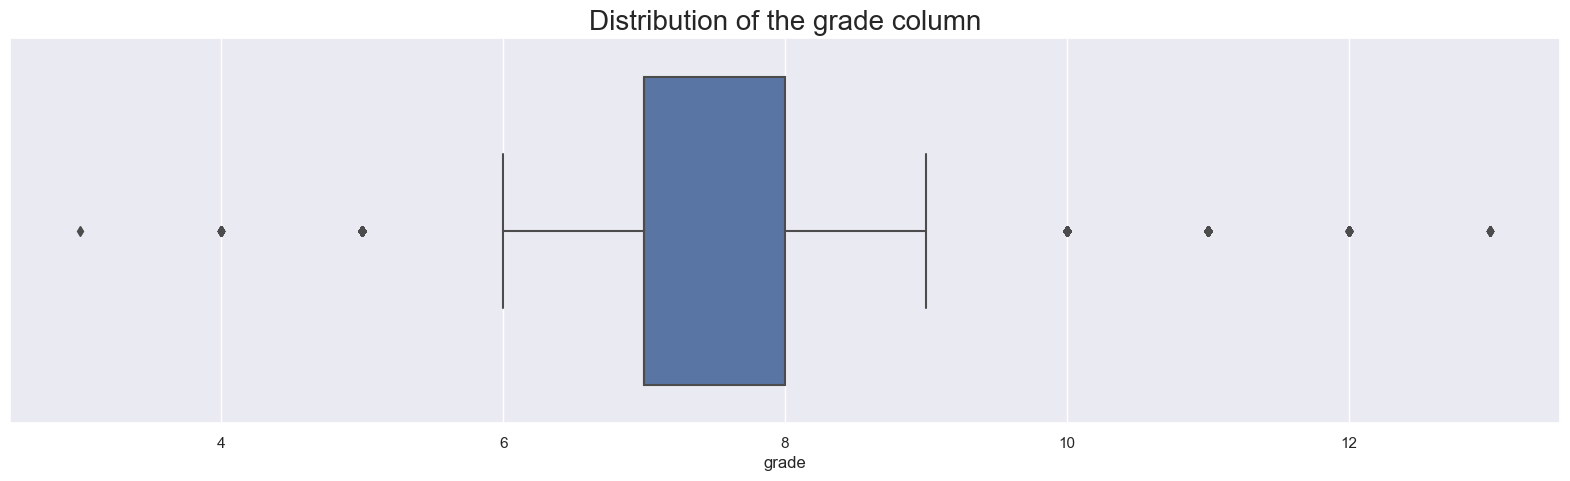

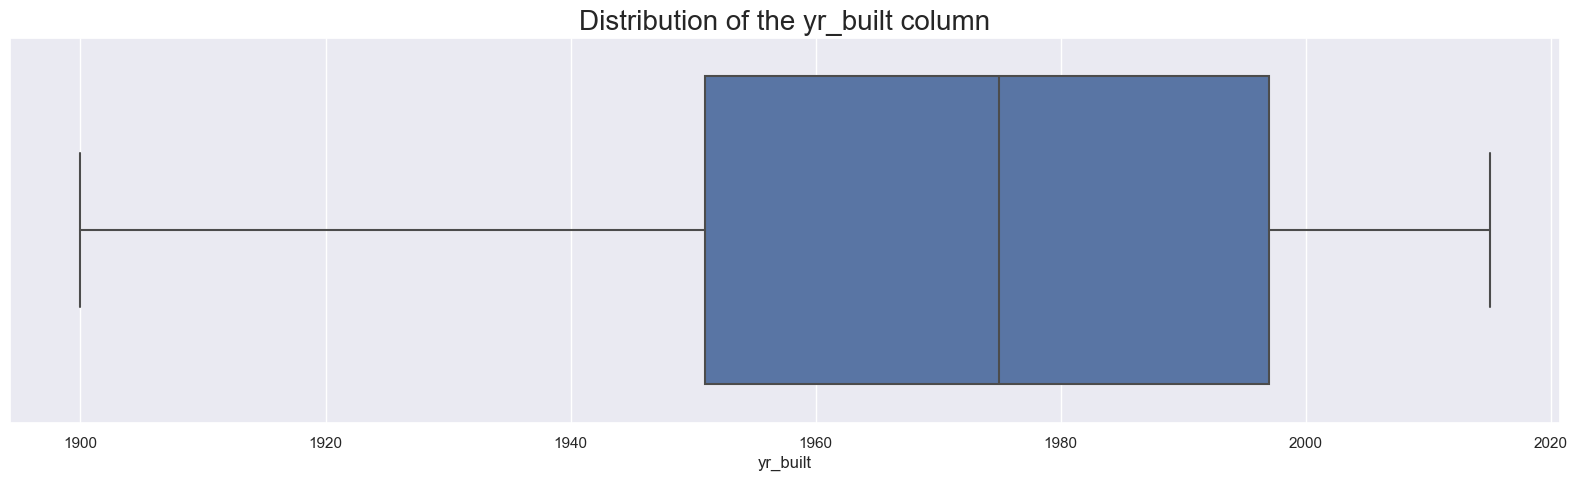

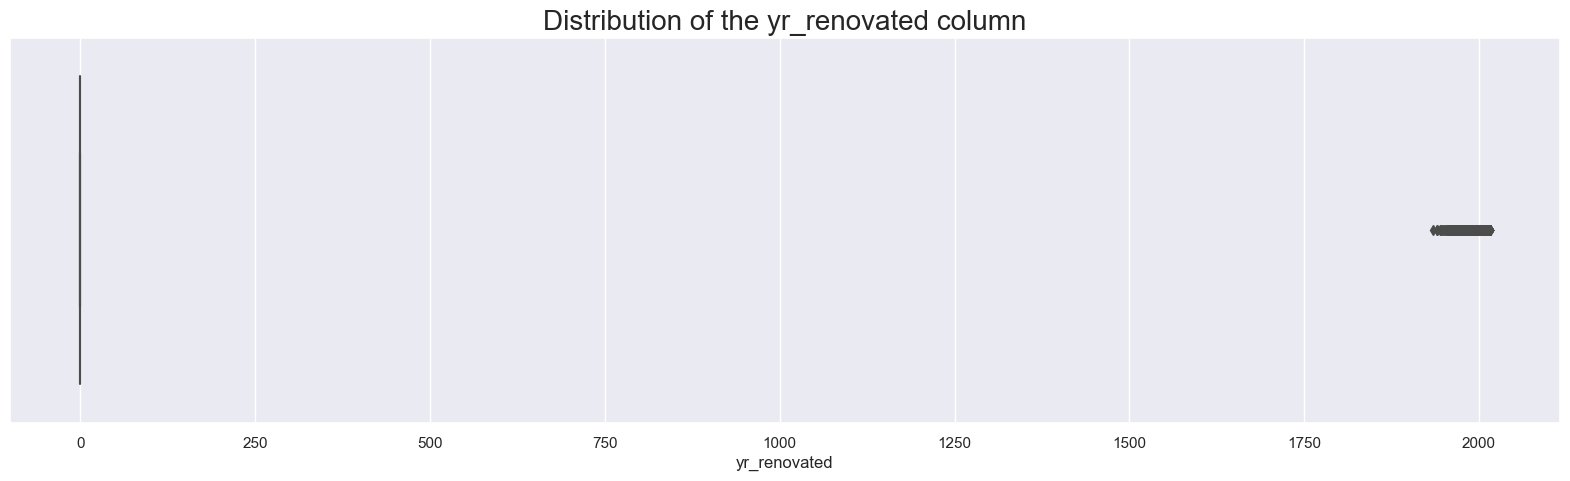

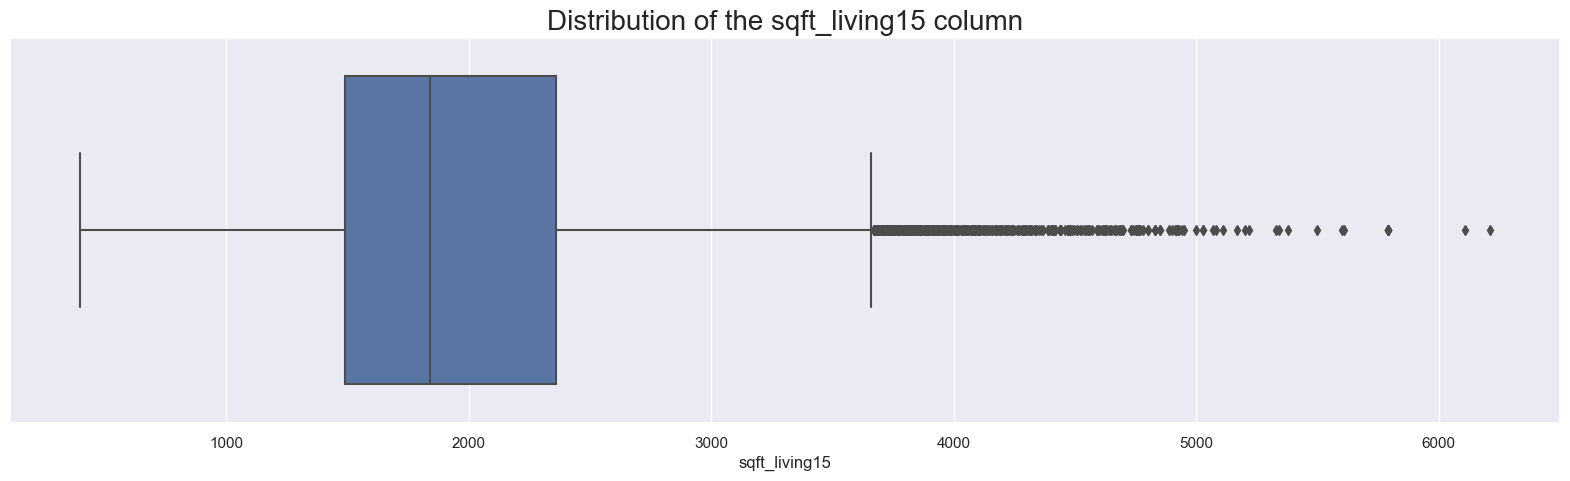

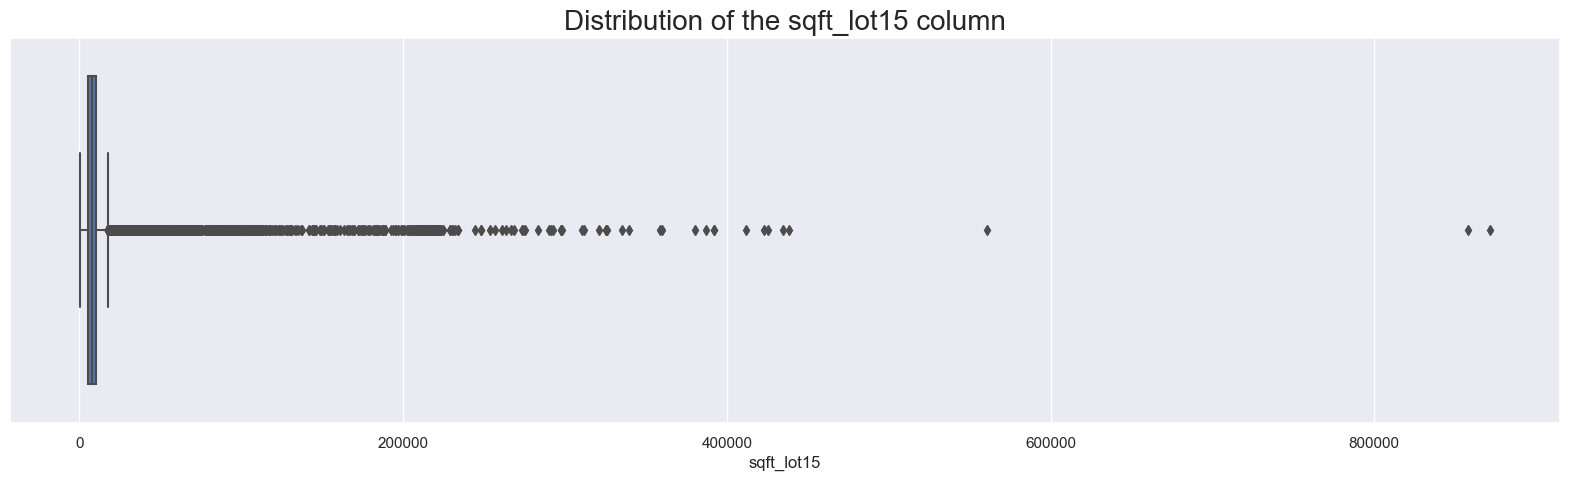

In [21]:
# we will use subplots to plot individual boxplots
#cols = ['floors','view','grade','yr_built','yr_renovated','sqft_living15','sqft_lot15']

df1 = data[['floors','view','grade','yr_built','yr_renovated','sqft_living15','sqft_lot15']]

# define subplot grid
for column in df1:
        plt.figure(figsize=(20,5))
        plt.title('Distribution of the ' + column+ ' column',fontsize=(20))
        sns.boxplot(data=df1, x=column)

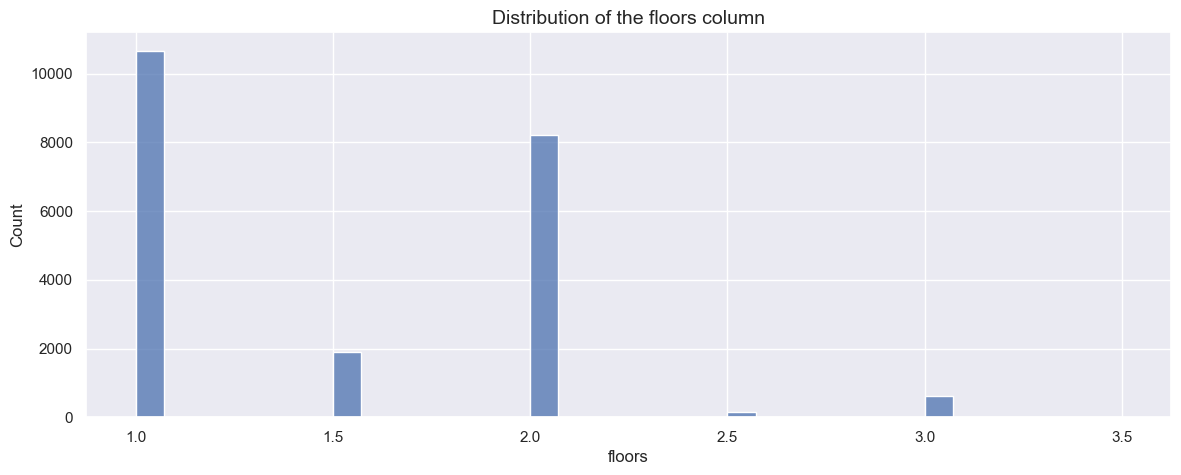

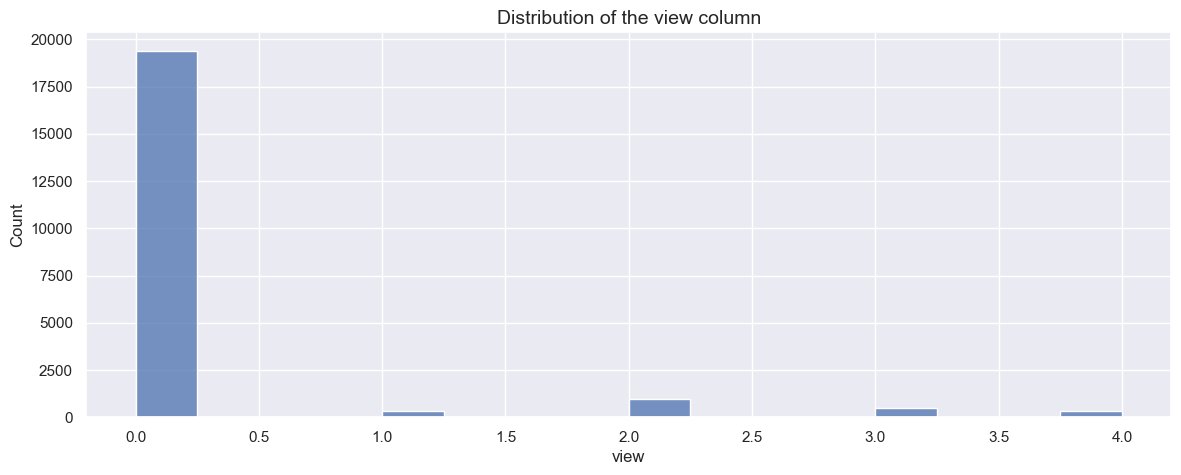

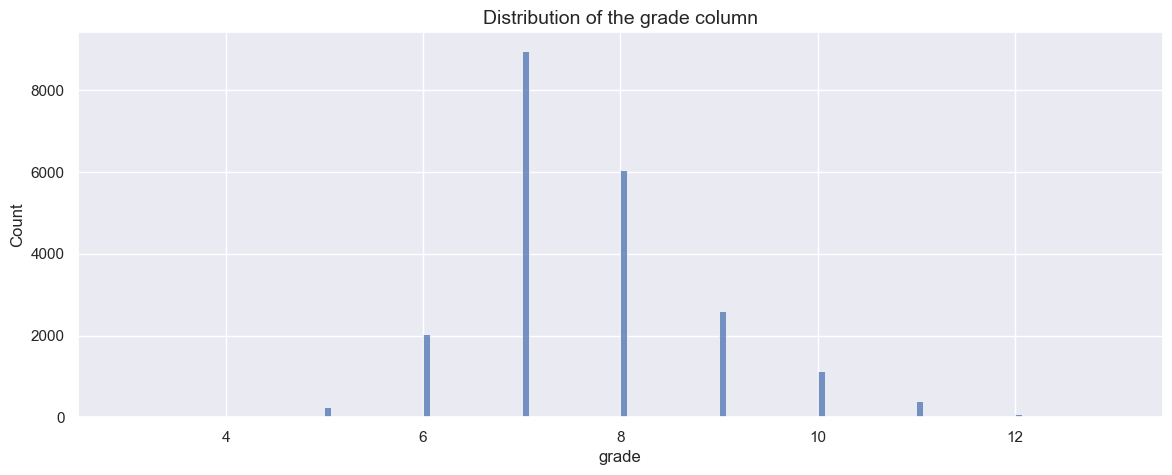

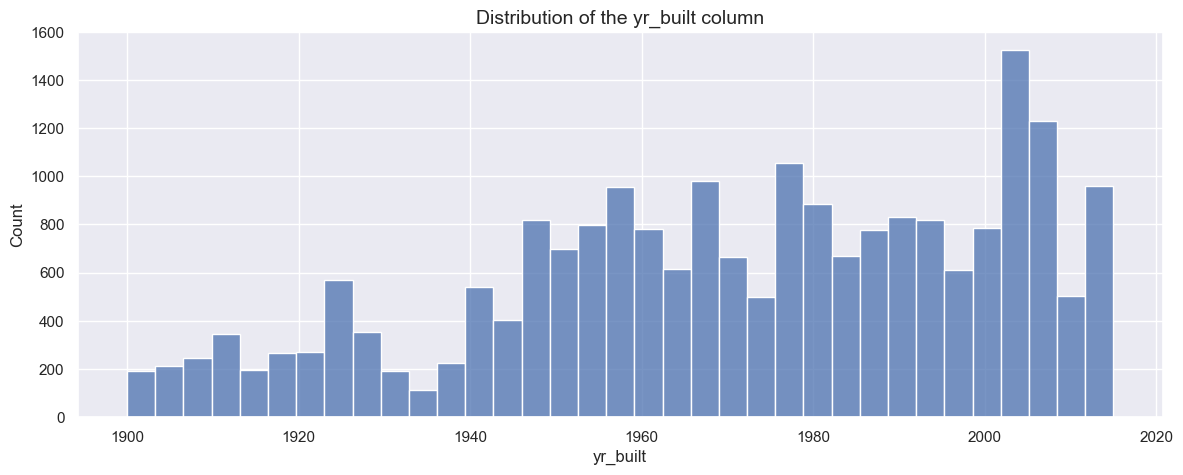

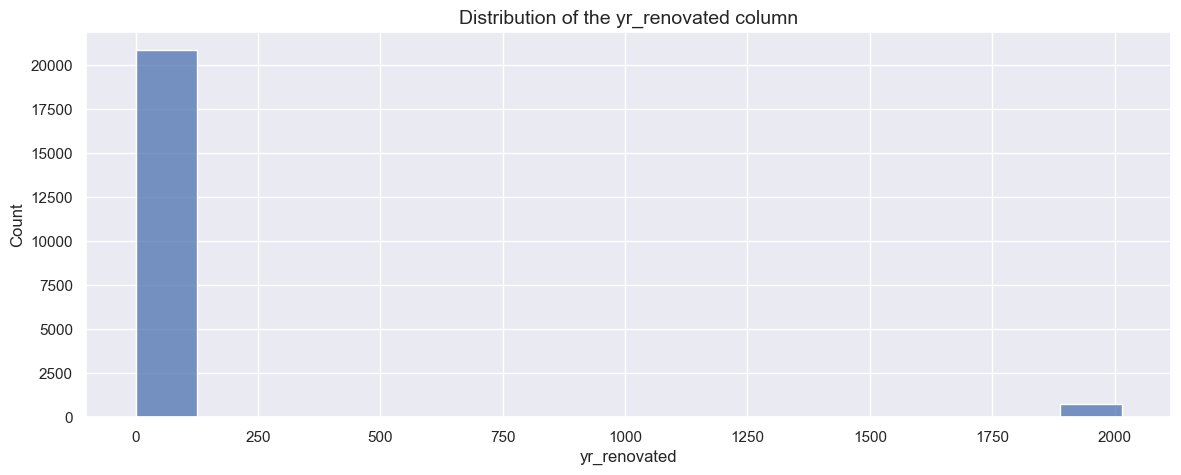

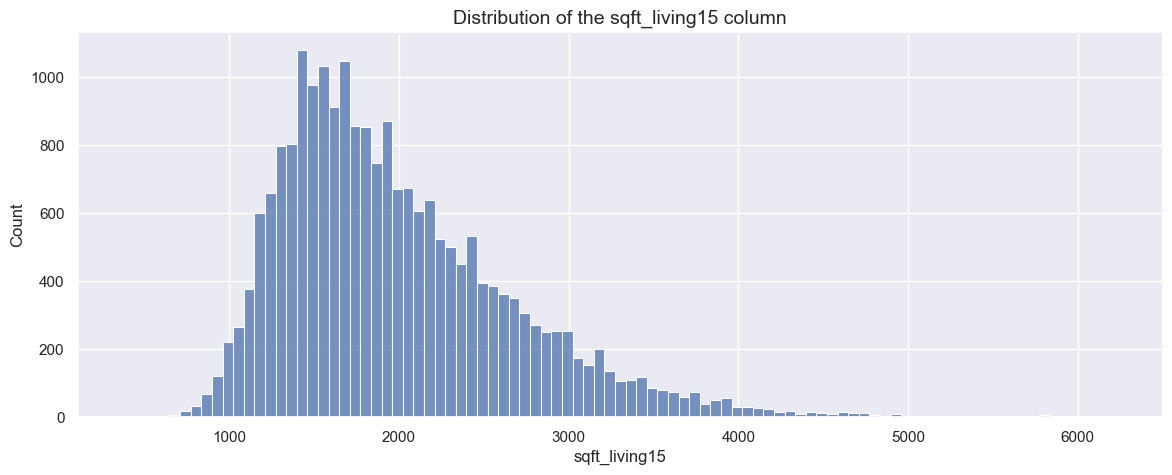

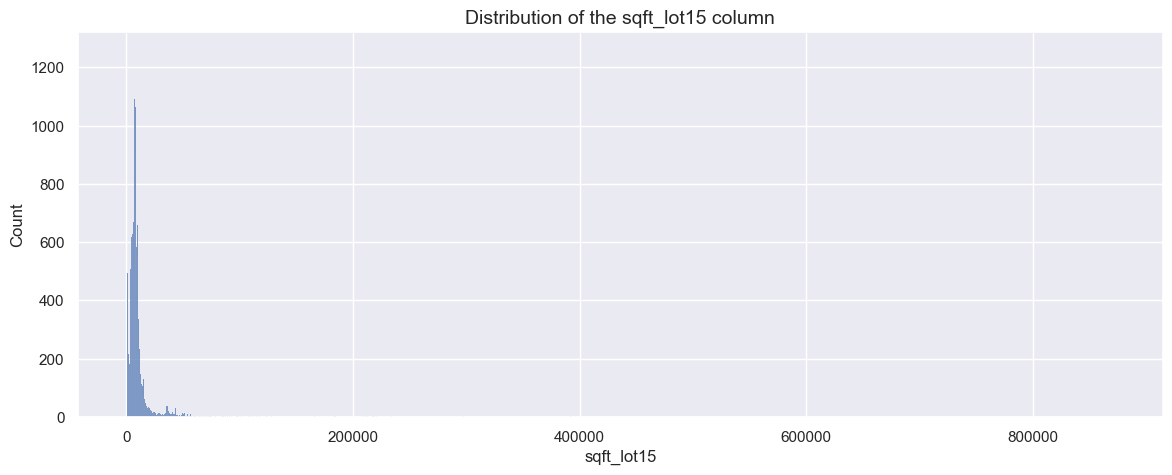

In [22]:
# Plotting histograms for our columns

for column in df1:
        plt.figure(figsize=(14,5))
        plt.title('Distribution of the ' + column+ ' column',fontsize=(14))
        sns.histplot(data=df1, x=column)

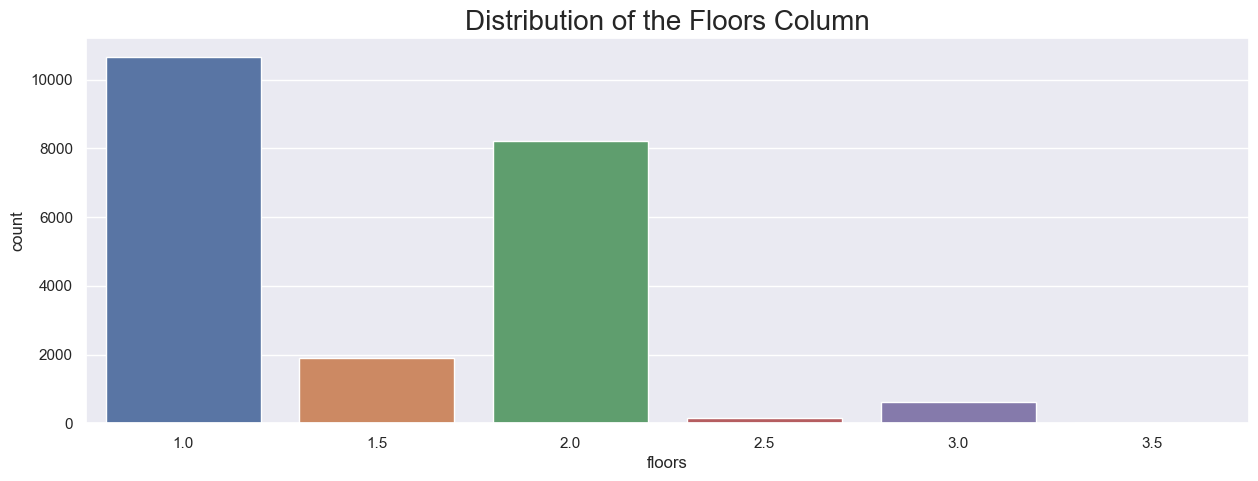

In [23]:
# Plotting the Distibution of the Genres
plt.figure(figsize=(15,5))
plt.title('Distribution of the Floors Column',fontsize=(20))
sns.countplot(data=data,x='floors');

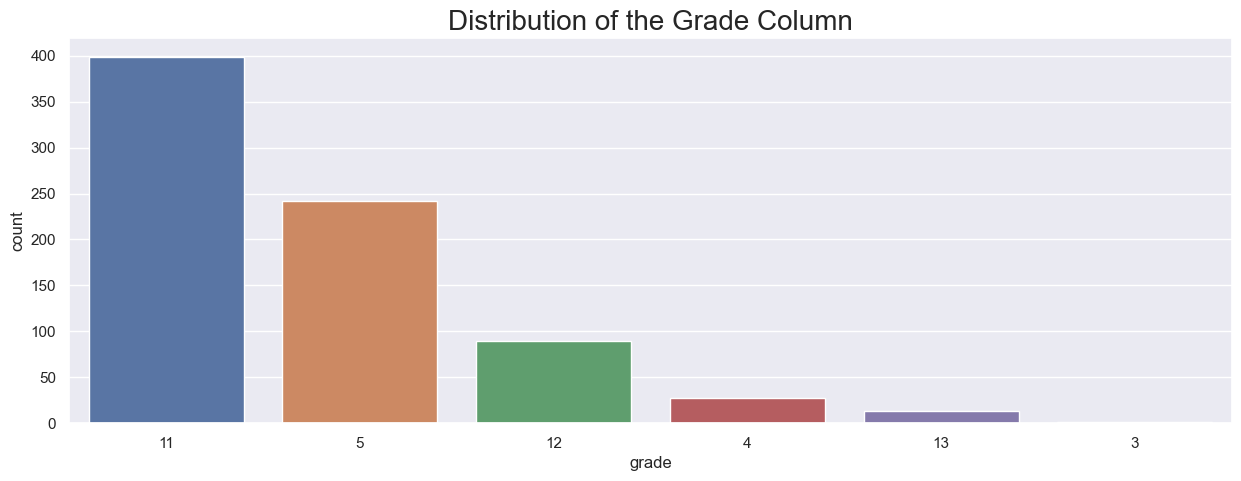

In [24]:
# Instead you can, and should, plot the top 10. 
# Even in this instance alot of the values are overlapping, what you should do is flip the plot. 
plt.figure(figsize=(15,5))
plt.title('Distribution of the Grade Column',fontsize=(20))
sns.countplot(x='grade',data=data,order=pd.value_counts(data['grade']).iloc[5:].index);

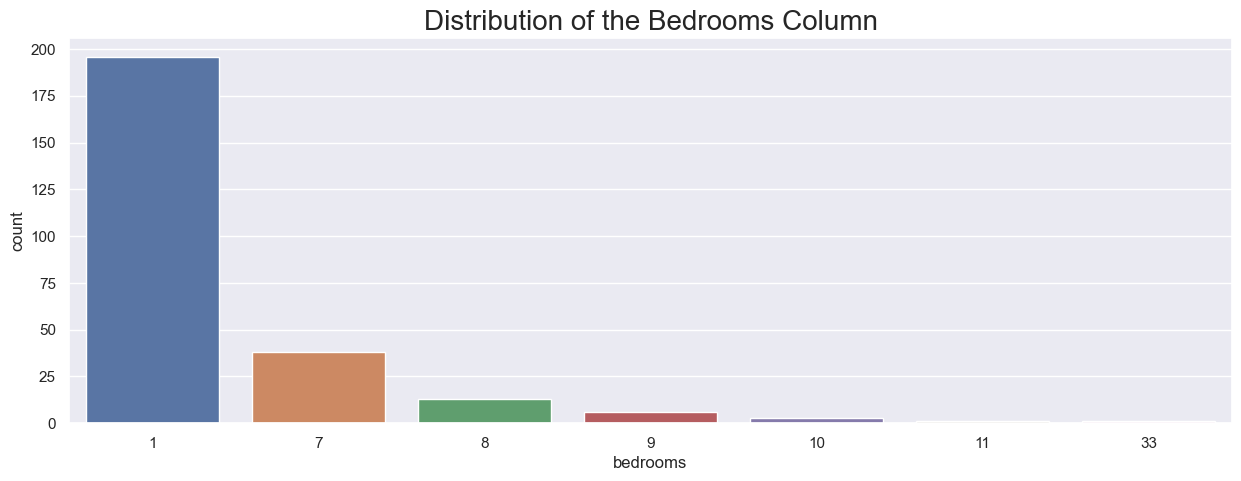

In [25]:
# Instead you can, and should, plot the top 10. 
# Even in this instance alot of the values are overlapping, what you should do is flip the plot. 
plt.figure(figsize=(15,5))
plt.title('Distribution of the Bedrooms Column',fontsize=(20))
sns.countplot(x='bedrooms',data=data,order=pd.value_counts(data['bedrooms']).iloc[5:].index);


## Correlation Analysis

In [26]:
data.corr()

,price,bedrooms,floors,view,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308865,0.257337,0.396067,0.668050,0.054042,0.117910,0.585179,0.082778
bedrooms,0.308865,1.000000,0.178264,0.078634,0.356749,0.155881,0.017758,0.393164,0.030636
floors,0.257337,0.178264,1.000000,0.028065,0.458949,0.488667,0.003819,0.281026,-0.010245
view,0.396067,0.078634,0.028065,1.000000,0.249994,-0.054457,0.089571,0.279907,0.073383
grade,0.668050,0.356749,0.458949,0.249994,1.000000,0.447758,0.015616,0.714182,0.121105
yr_built,0.054042,0.155881,0.488667,-0.054457,0.447758,1.000000,-0.202365,0.326912,0.071196
yr_renovated,0.117910,0.017758,0.003819,0.089571,0.015616,-0.202365,1.000000,0.000449,0.004204
sqft_living15,0.585179,0.393164,0.281026,0.279907,0.714182,0.326912,0.000449,1.000000,0.183478
sqft_lot15,0.082778,0.030636,-0.010245,0.073383,0.121105,0.071196,0.004204,0.183478,1.000000


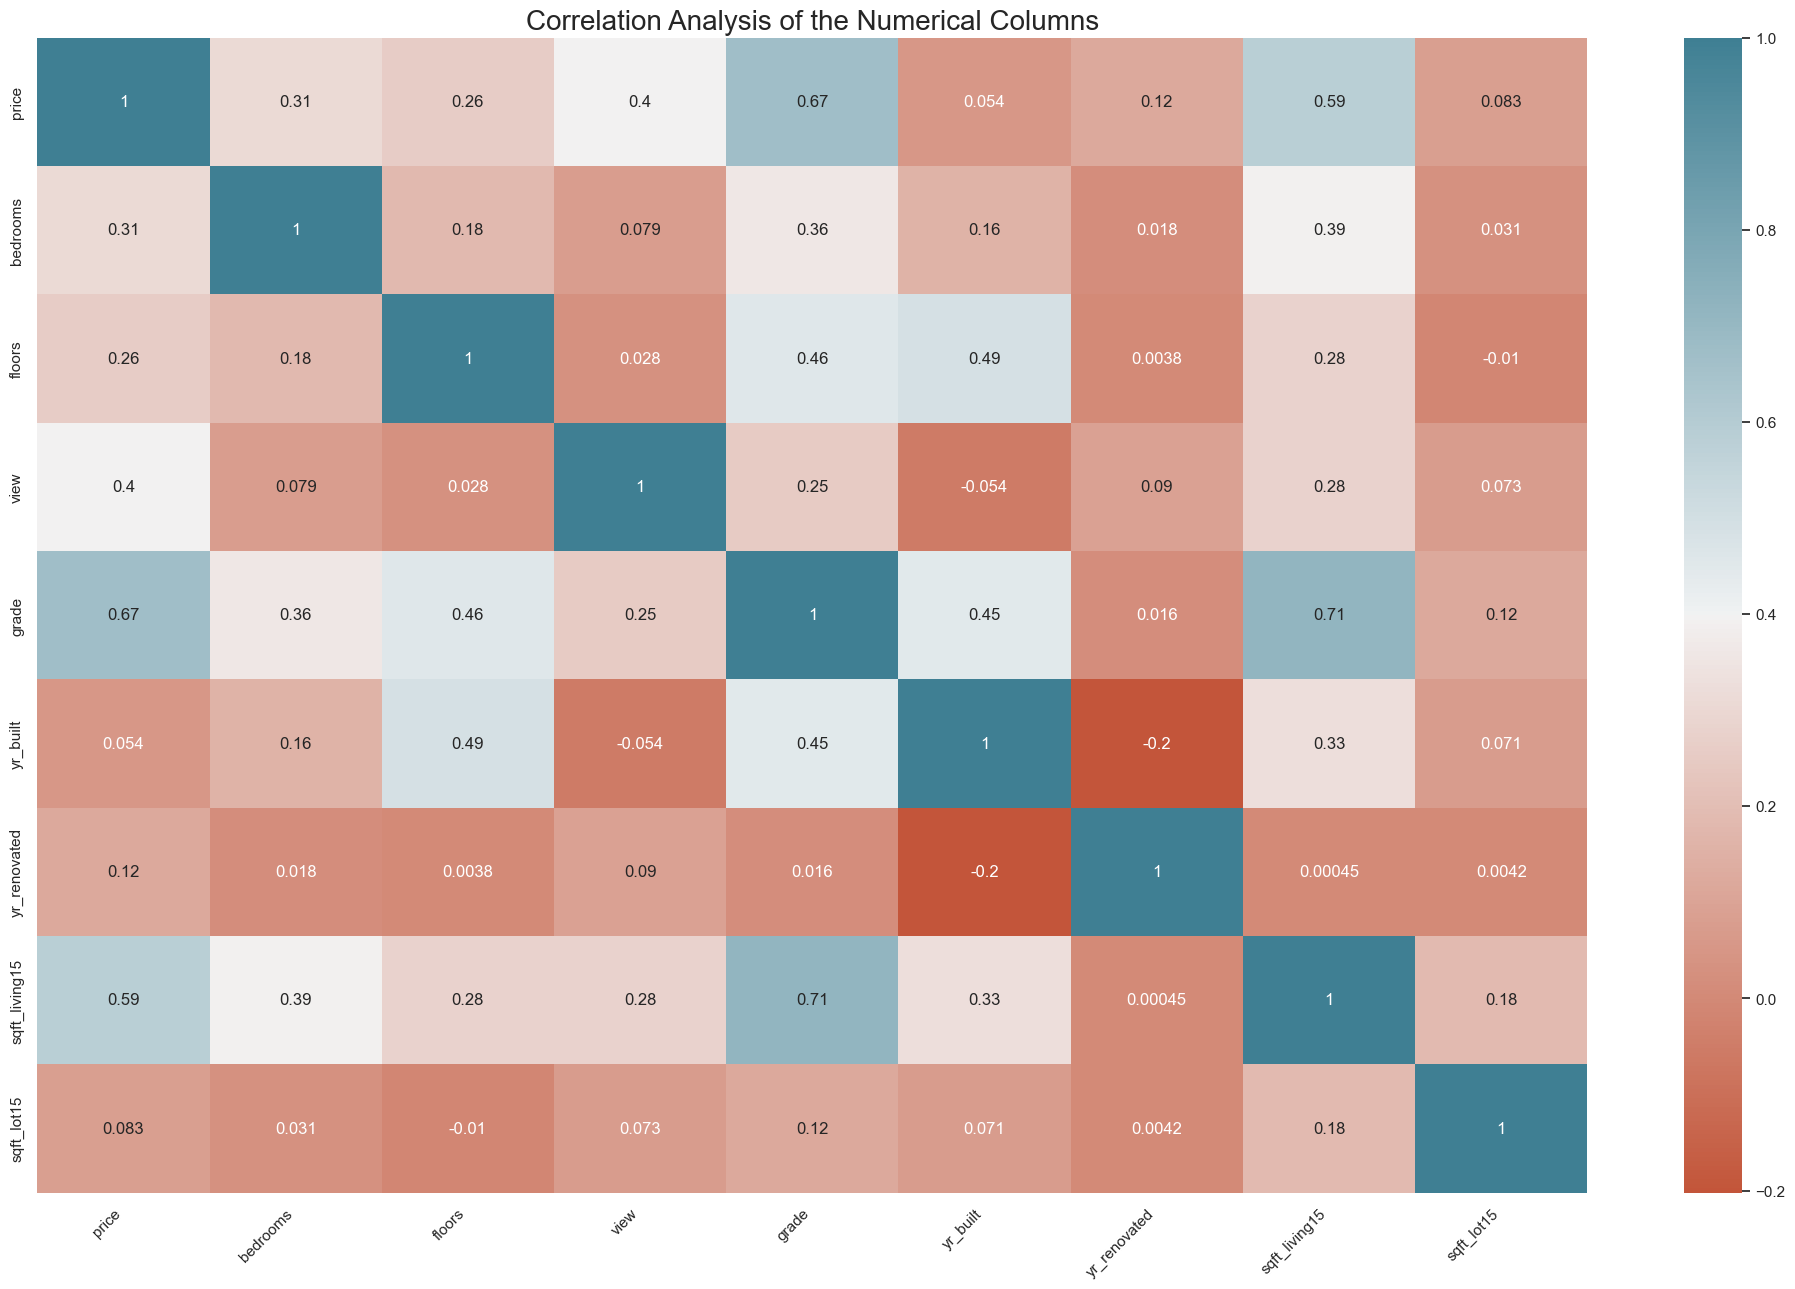

In [27]:
 

plt.figure(figsize = (25,15))
plt.title('Correlation Analysis of the Numerical Columns',fontsize=20)
ax = sns.heatmap(data.corr(),cmap=sns.diverging_palette(20, 220, n=256), annot = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
plt.show()

In [28]:
# looking at the correlation with our target / dependent variable 'price'
data_corrs=data.corr()['price'].map(abs).sort_values(ascending=False)
data_corrs

price            1.000000
grade            0.668050
sqft_living15    0.585179
view             0.396067
bedrooms         0.308865
floors           0.257337
yr_renovated     0.117910
sqft_lot15       0.082778
yr_built         0.054042
Name: price, dtype: float64

### Checking for Outliers

In [29]:
summary=data.describe()
 # checking for outliers
    
outliers = data[data['price'] > summary.loc['75%', 'price'] + 1.5 * (summary.loc['75%', 'price'] - summary.loc['25%','price'])]
outliers

,price,bedrooms,floors,view,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
5,1230000.0,4,1.0,0.0,11,2001,0.0,4760,101930
21,2000000.0,3,1.0,4.0,9,1968,0.0,4110,20336
49,1350000.0,3,1.0,2.0,9,1953,0.0,2680,72513
69,1330000.0,5,1.0,0.0,8,1965,0.0,3390,20158
125,1450000.0,4,1.5,0.0,8,1914,1992.0,3060,11275
...,...,...,...,...,...,...,...,...,...
21552,1700000.0,4,2.0,0.0,10,2014,0.0,2190,10777
21560,3570000.0,5,2.0,4.0,10,2007,0.0,3470,18270
21574,1220000.0,4,1.5,0.0,11,2007,0.0,4560,11063
21581,1580000.0,4,2.0,0.0,10,2007,0.0,2290,10125


In [30]:
## We create a function that takes in a dataset with its given columns to remove the outliers for us.
def remove_outliers(df, col_names):
    q1 = df[col_names].quantile(0.25)
    q3 = df[col_names].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_filtered = df[(df[col_names] > lower_bound) & (df[col_names] < upper_bound)]
    return df_filtered

In [31]:
new_data = remove_outliers(data,['price','grade','floors','yr_renovated','bedrooms','yr_built','sqft_living15','sqft_lot15'])
new_data

,price,bedrooms,floors,view,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3.0,1.0,NaN,7.0,1955,NaN,1340.0,5650.0
1,538000.0,3.0,2.0,NaN,7.0,1951,NaN,1690.0,7639.0
2,180000.0,2.0,1.0,NaN,6.0,1933,NaN,2720.0,8062.0
3,604000.0,4.0,1.0,NaN,7.0,1965,NaN,1360.0,5000.0
4,510000.0,3.0,1.0,NaN,8.0,1987,NaN,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...
21592,360000.0,3.0,3.0,NaN,8.0,2009,NaN,1530.0,1509.0
21593,400000.0,4.0,2.0,NaN,8.0,2014,NaN,1830.0,7200.0
21594,402101.0,2.0,2.0,NaN,7.0,2009,NaN,1020.0,2007.0
21595,400000.0,3.0,2.0,NaN,8.0,2004,NaN,1410.0,1287.0


In [32]:
 # dealing with NaN and infinite values
def handle_nan_inf(new_data):

    # Replace infinite values with NaN
    new_data.replace([np.inf, -np.inf], np.nan, inplace=True)

      # Replace NaN values with 0
    new_data.fillna(0, inplace=True)

    return new_data

In [33]:
handle_nan_inf(new_data)

,price,bedrooms,floors,view,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3.0,1.0,0.0,7.0,1955,0.0,1340.0,5650.0
1,538000.0,3.0,2.0,0.0,7.0,1951,0.0,1690.0,7639.0
2,180000.0,2.0,1.0,0.0,6.0,1933,0.0,2720.0,8062.0
3,604000.0,4.0,1.0,0.0,7.0,1965,0.0,1360.0,5000.0
4,510000.0,3.0,1.0,0.0,8.0,1987,0.0,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...
21592,360000.0,3.0,3.0,0.0,8.0,2009,0.0,1530.0,1509.0
21593,400000.0,4.0,2.0,0.0,8.0,2014,0.0,1830.0,7200.0
21594,402101.0,2.0,2.0,0.0,7.0,2009,0.0,1020.0,2007.0
21595,400000.0,3.0,2.0,0.0,8.0,2004,0.0,1410.0,1287.0


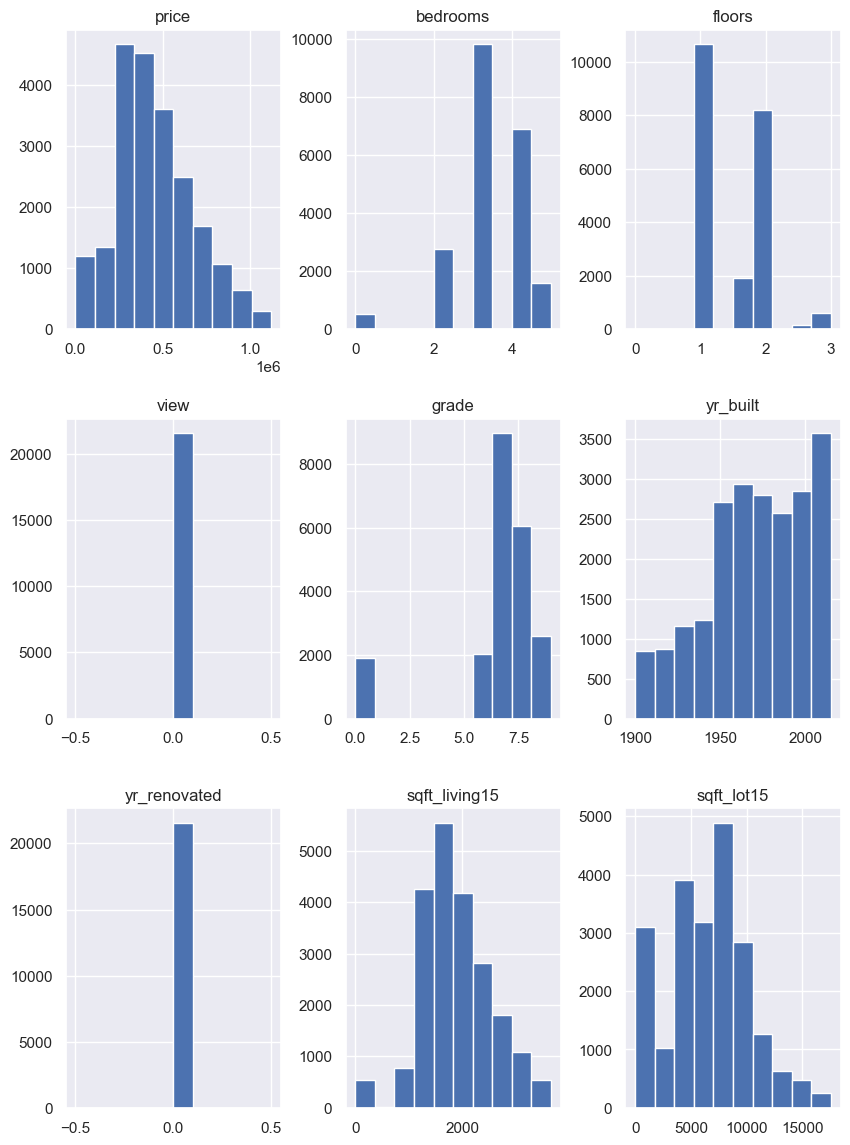

In [34]:
## using a histogram to identify categorical values 
import warnings
warnings.filterwarnings('ignore')
fig=plt.figure(figsize=(10,14))
ax=fig.gca()
new_data.hist(ax=ax);

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

The relationship is not linear.


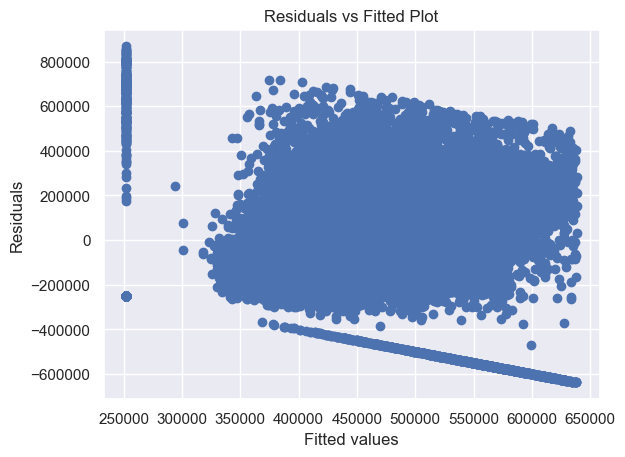

In [36]:
# Fit model
model = sm.OLS(new_data['price'], sm.add_constant(new_data['sqft_living15'])).fit()

# Create residual vs fitted plot
residuals = model.resid
fitted = model.fittedvalues
plt.scatter(fitted, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Plot')
#plt.show()

# Check for linearity
if abs(residuals).max() < 0.05 * abs(fitted).max():
    print('The relationship is linear.')
else:
    print('The relationship is not linear.')

plt.show()

The relationship is not linear.


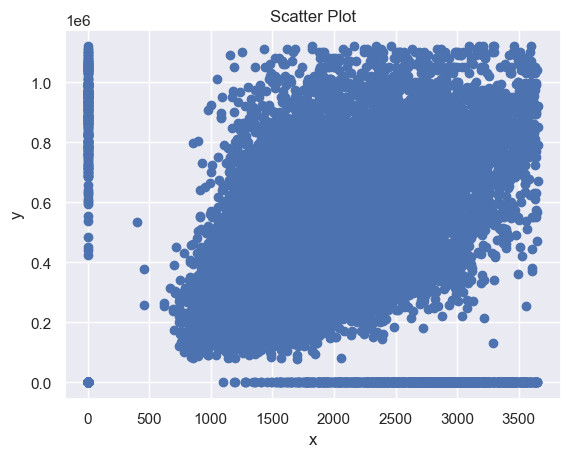

In [37]:
# Create scatter plot
plt.scatter(new_data['sqft_living15'], new_data['price'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
#plt.show()

# Check for linearity using a scatter plot 
if abs(data['price'].corr(data['sqft_living15'])) > 0.7:
    print('The relationship is linear.')
else:
    print('The relationship is not linear.')
    
plt.show()

In [38]:
data_corrs

price            1.000000
grade            0.668050
sqft_living15    0.585179
view             0.396067
bedrooms         0.308865
floors           0.257337
yr_renovated     0.117910
sqft_lot15       0.082778
yr_built         0.054042
Name: price, dtype: float64

In [39]:
 # using statsmodels t fit statistical models using Rstyle formula for Simple Regression
f= 'price~sqft_living15'
model=ols(f,new_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     2224.
Date:                Sat, 08 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:43:21   Log-Likelihood:            -2.9580e+05
No. Observations:               21574   AIC:                         5.916e+05
Df Residuals:                   21572   BIC:                         5.916e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.522e+05   4472.246     56.386      0.000    2.43e+05    2.61e+05
sqft_living15   105.6341      2.240     47.155      0.000     101.243     110.025
==============================================================================
Omnibus:                      711.542   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1449.902
Skew:                           0.230   Prob(JB):                         0.00
Kurtosis:                       4.184   Cond. No.                     6.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# we can say that 9% of the variations in dependent variable y(price) are explained by the independent('sqft_living15') 
# variable in our model 

eval_env: 1


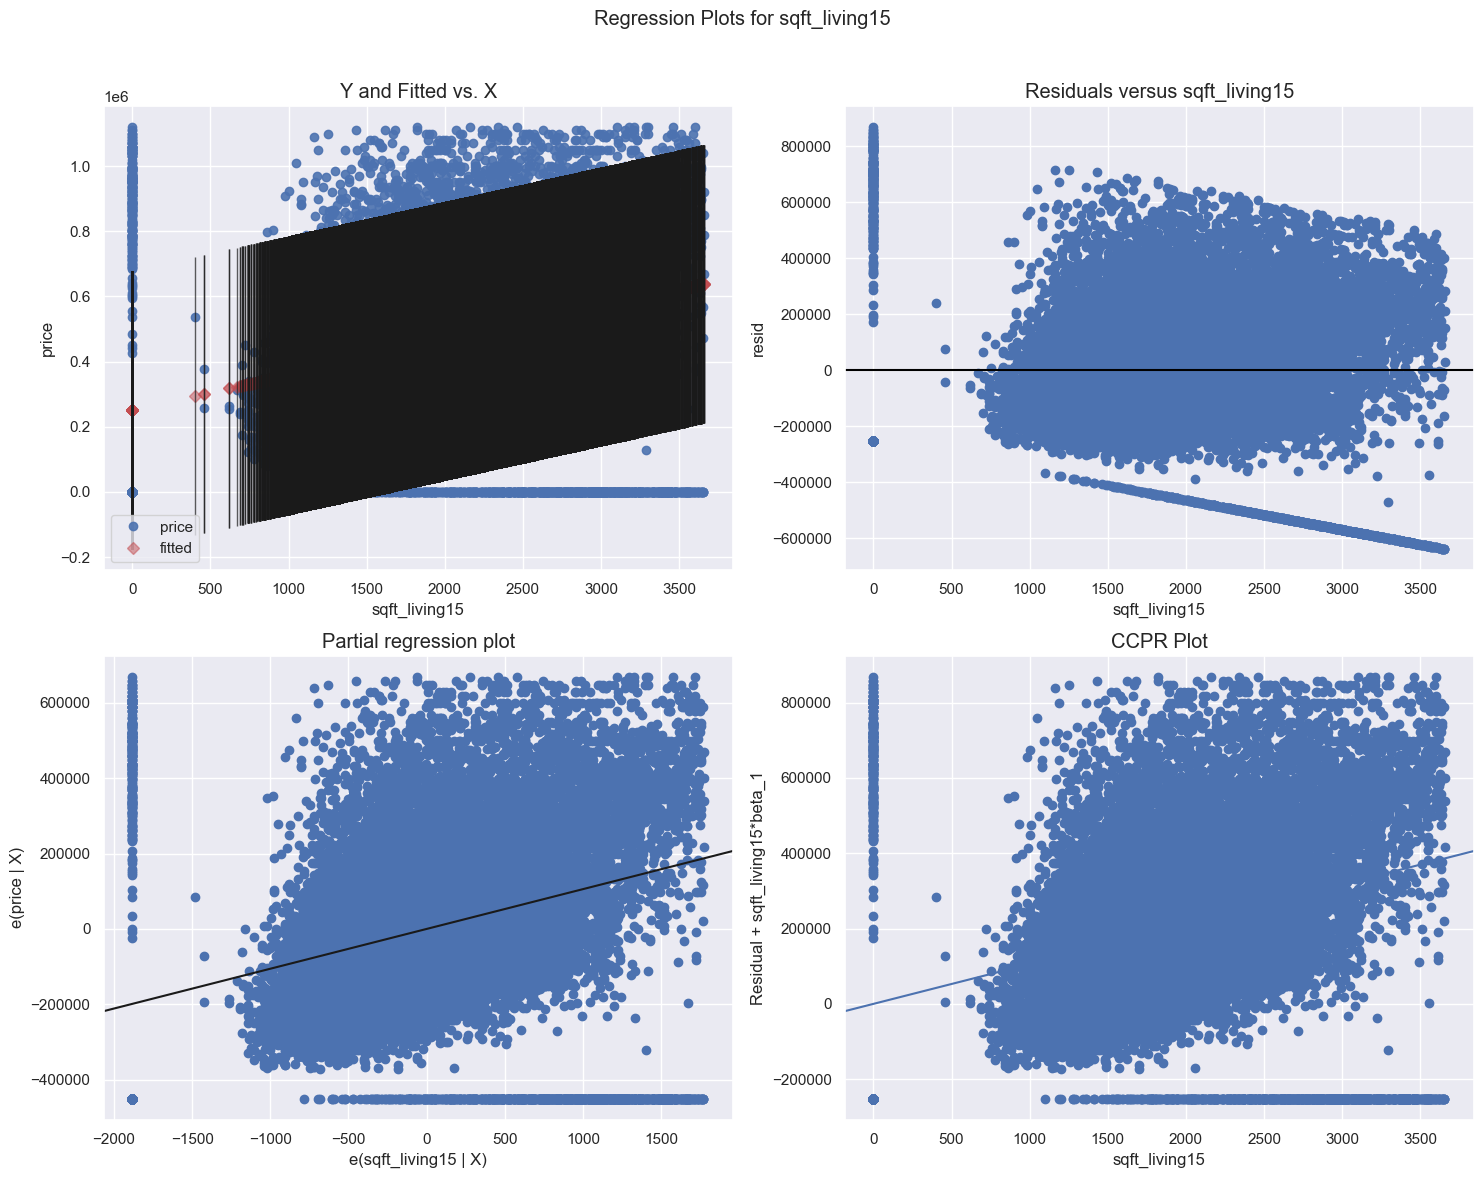

In [41]:
# we can plot some visualizations to check the regression assumptions with respect to the error terms
fig=plt.figure(figsize=(15,12))
fig=sm.graphics.plot_regress_exog(model,'sqft_living15',fig=fig);

In [42]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

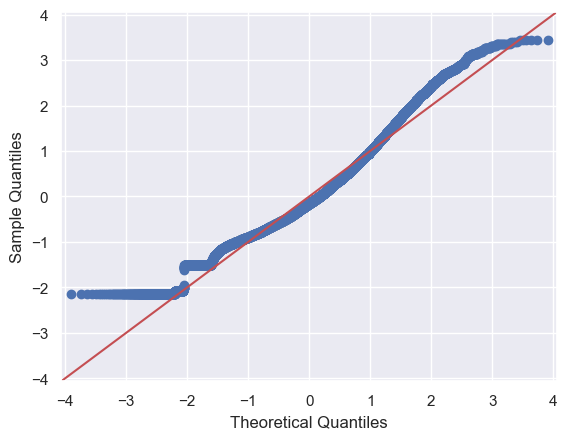

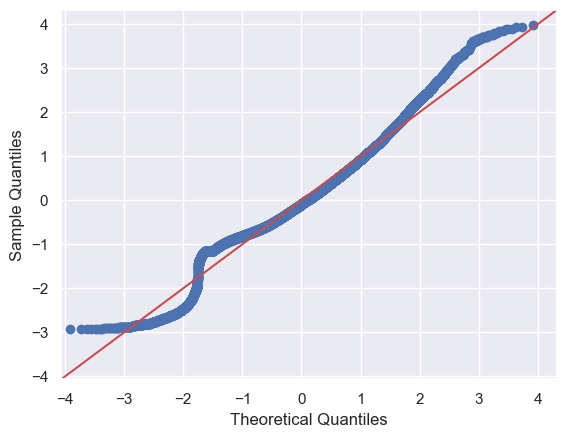

In [43]:
# we use normal Q-Q plots to visually assess how well our residuals match the aspects of distribution 
f='price~grade'
f2='price~sqft_living15'
model=smf.ols(formula=f,data=new_data).fit()
model2=smf.ols(formula=f2,data=new_data).fit()
resid1=model.resid
resid2=model2.resid
fig=sm.graphics.qqplot(resid1,dist=stats.norm,line='45',fit=True)
fig=sm.graphics.qqplot(resid2,dist=stats.norm,line='45',fit=True)

In [44]:
model.pvalues

Intercept     0.000000e+00
grade        4.419897e-126
dtype: float64

In [45]:
model2.pvalues

Intercept        0.0
sqft_living15    0.0
dtype: float64

In [46]:
# For categorical variables of continuous values, the scatter plots generate a pretty homogenous 'cloud' unlike 
# those that generate vertical lines for discrete values.

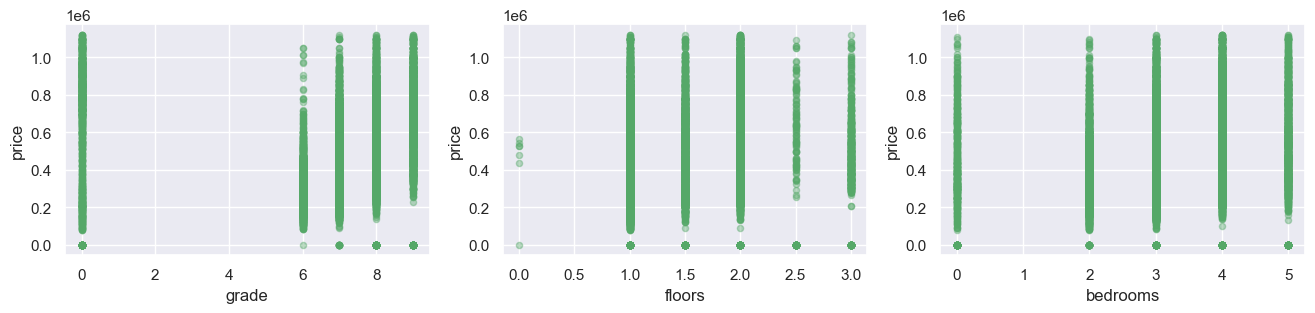

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,axes= plt.subplots(nrows=1,ncols=3,figsize=(16,3))
for xcol, ax in zip(['grade','floors','bedrooms'],axes):
    new_data.plot(kind='scatter',x=xcol,y='price',ax=ax,alpha=0.4,color='g')

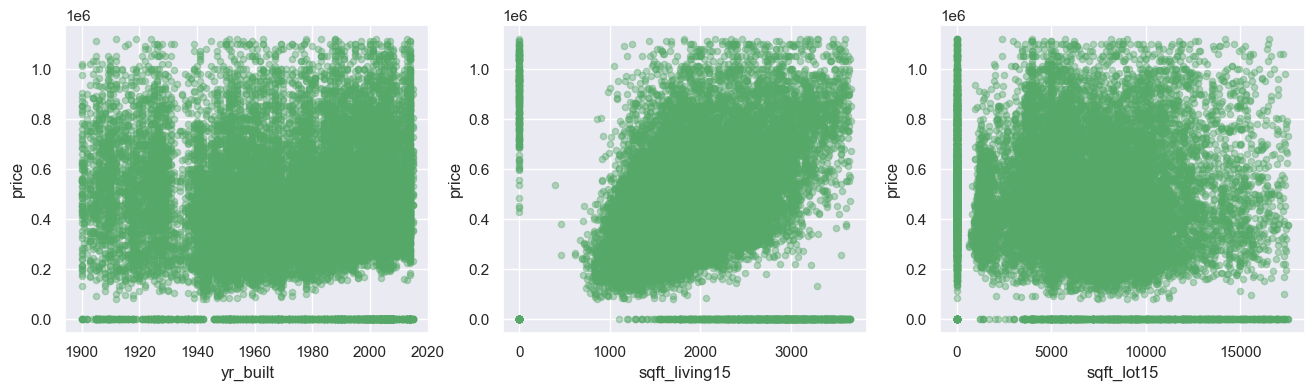

In [48]:
fig,axes= plt.subplots(nrows=1,ncols=3,figsize=(16,4))
for xcol, ax in zip(['yr_built','sqft_living15','sqft_lot15'],axes):
    new_data.plot(kind='scatter',x=xcol,y='price',ax=ax,alpha=0.4,color='g')

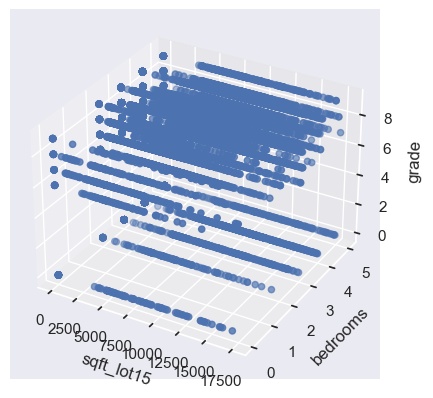

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select 3 columns
X = new_data[['sqft_lot15', 'bedrooms', 'grade']]

# Plot results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['sqft_lot15'], X['bedrooms'], X['grade'])
ax.set_xlabel('sqft_lot15')
ax.set_ylabel('bedrooms')
ax.set_zlabel('grade')
plt.show()

In [50]:
# Select categorical columns
#cat_cols = ['price', 'bedrooms']

# Transform categorical columns using one-hot encoding
#data = pd.get_dummies(new_data, columns=cat_cols)

# Print results
#print(data.head())

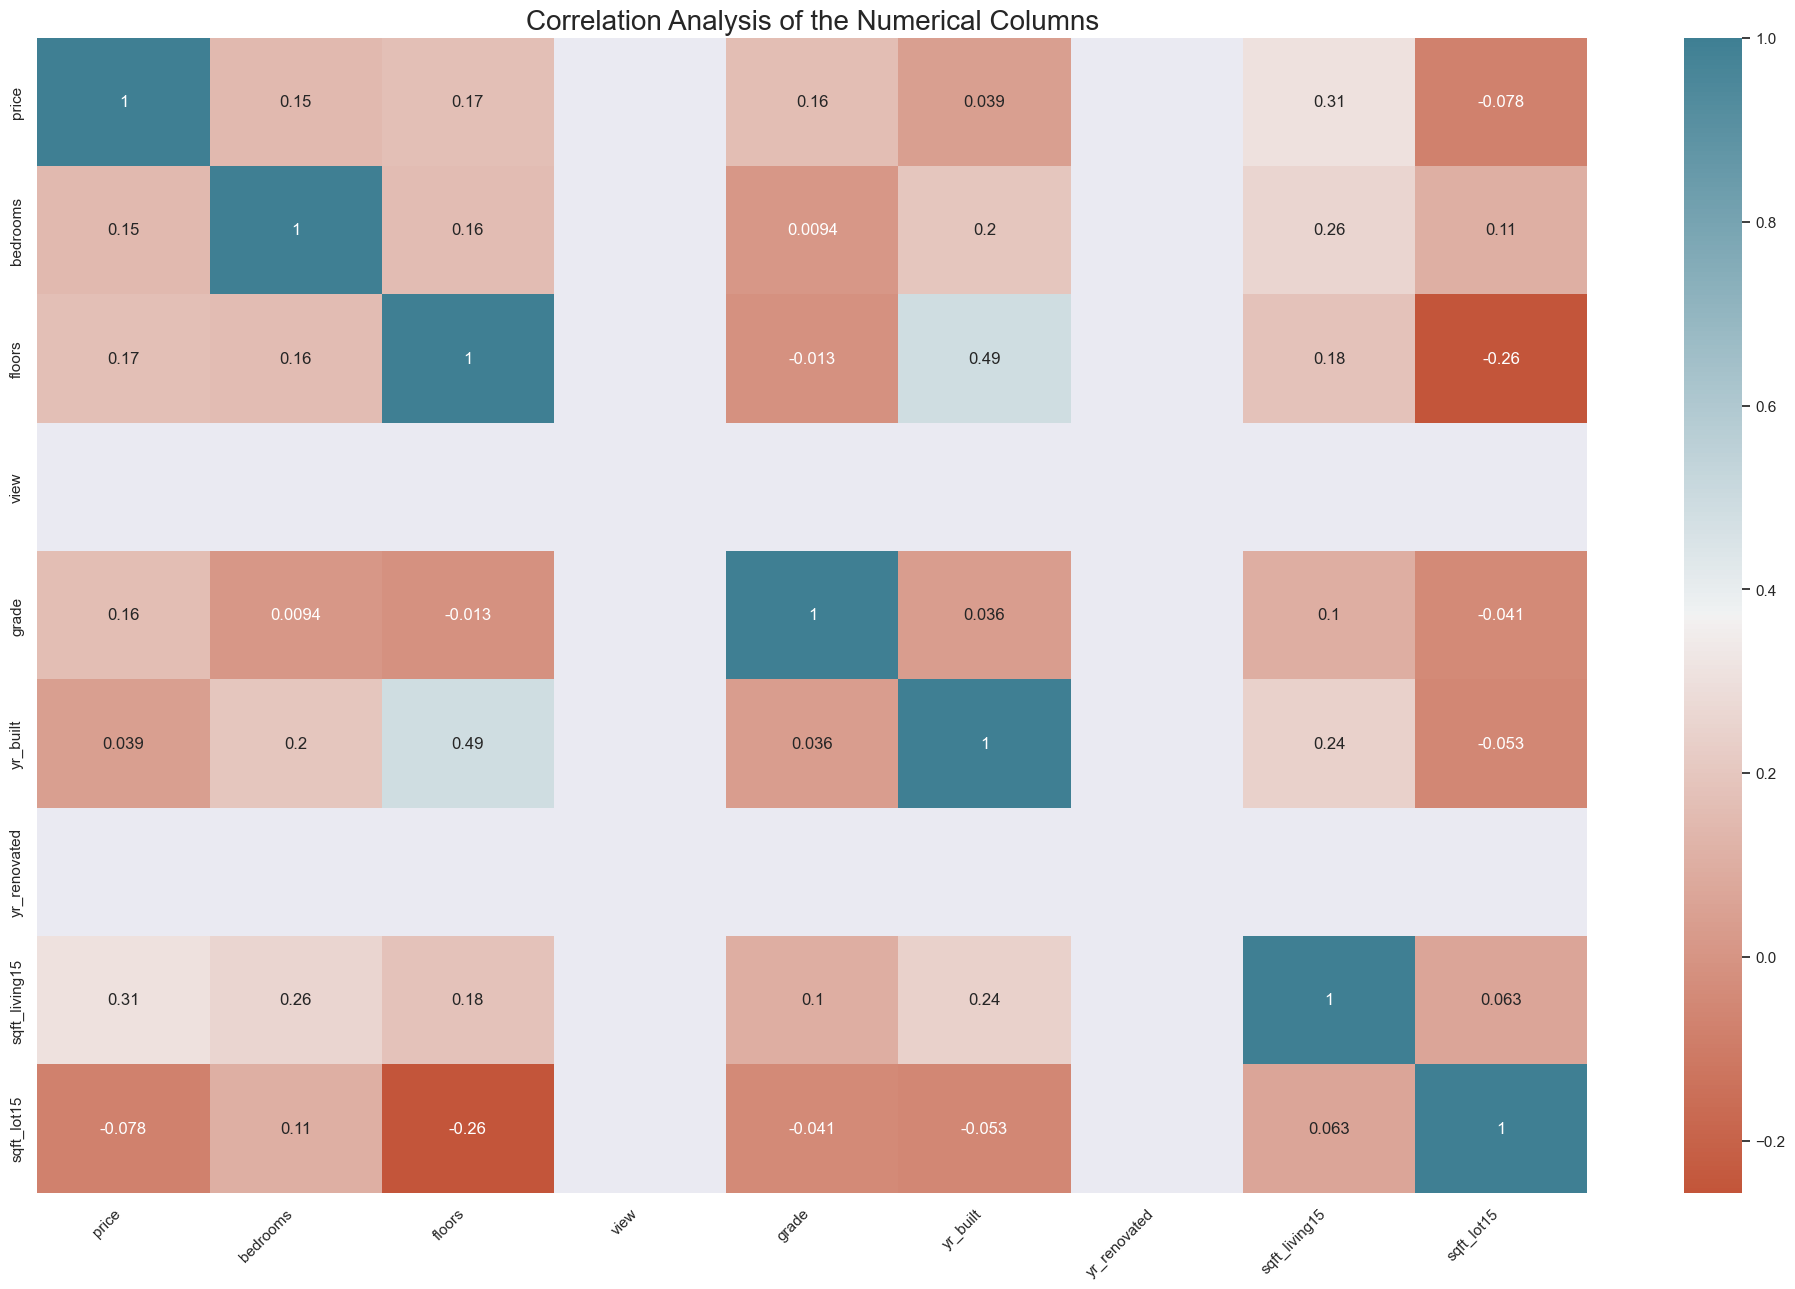

In [51]:
# Plot results
plt.figure(figsize = (25,15))
plt.title('Correlation Analysis of the Numerical Columns',fontsize=20)
ax = sns.heatmap(new_data.corr(),cmap=sns.diverging_palette(20, 220, n=256), annot = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
plt.show()

In [52]:
# feature scaling and normalization help to manage the difference in magnitude in the datasets
### log transformation below is useful tool in data that does not follow a normal distribution. 

In [53]:
#import numpy as np
#import pandas as pd
#data_log=pd.DataFrame(['bedrooms'])
#data_log['logpr']=np.log(new_data['bedrooms'])
#data_log['logpr'].hist(figsize=[6,6]);

### Model validation

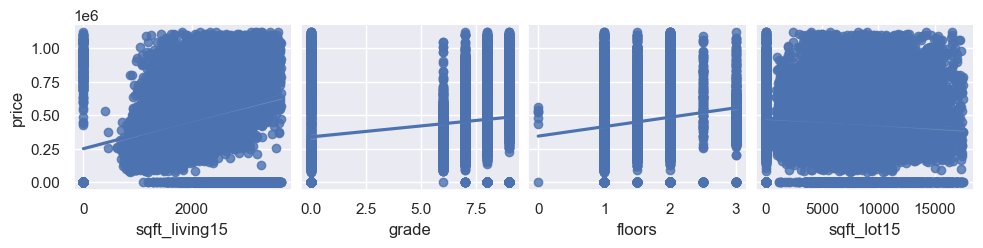

In [54]:
  ## Visualisation to judge the variables which have a linear relationship with price 
sns.pairplot(new_data,x_vars=['sqft_living15','grade','floors','sqft_lot15'],y_vars='price',kind='reg');

In [55]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [56]:

#newer_data=new_data.fillna(0)
y=new_data[['price']]
x=new_data.drop(['price'], axis=1)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [57]:
x_train

,bedrooms,floors,view,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
158,3.0,1.5,0.0,7.0,1916,0.0,1160.0,7198.0
20568,4.0,2.0,0.0,7.0,2007,0.0,2430.0,5900.0
9743,3.0,1.0,0.0,8.0,1989,0.0,1790.0,6459.0
5240,3.0,1.0,0.0,8.0,1966,0.0,2180.0,8103.0
345,4.0,1.0,0.0,6.0,1943,0.0,1020.0,7138.0
...,...,...,...,...,...,...,...,...
3393,3.0,1.0,0.0,7.0,1979,0.0,1980.0,15204.0
6390,3.0,1.0,0.0,6.0,1969,0.0,870.0,5200.0
5741,3.0,1.0,0.0,8.0,1978,0.0,1940.0,8510.0
12329,3.0,1.5,0.0,7.0,1912,0.0,1720.0,3750.0


In [58]:
y_train

,price
158,247000.0
20568,492000.0
9743,329000.0
5240,520000.0
345,165000.0
...,...
3393,225000.0
6390,178000.0
5741,267000.0
12329,625000.0


In [59]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

17259 4315 17259 4315


In [60]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17259 entries, 158 to 19957
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       17259 non-null  float64
 1   floors         17259 non-null  float64
 2   view           17259 non-null  float64
 3   grade          17259 non-null  float64
 4   yr_built       17259 non-null  int64  
 5   yr_renovated   17259 non-null  float64
 6   sqft_living15  17259 non-null  float64
 7   sqft_lot15     17259 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.2 MB


In [61]:
y_train

,price
158,247000.0
20568,492000.0
9743,329000.0
5240,520000.0
345,165000.0
...,...
3393,225000.0
6390,178000.0
5741,267000.0
12329,625000.0


In [62]:
# to avoid data leakage, we do our data preparation after the split

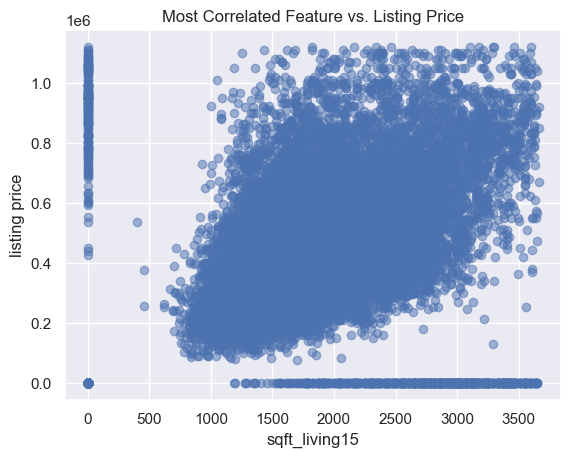

In [63]:
fig, ax = plt.subplots()

ax.scatter(x_train['sqft_living15'], y_train, alpha=0.5)
ax.set_xlabel('sqft_living15')
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Listing Price");

In [64]:
most_correlated_feature=['grade']
most_correlated_feature

['grade']

Let's build our baseline model that we will use as a comparison on the training model.

In [65]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [66]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=x_train[most_correlated_feature],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.02796238754100977
Validation score: 0.024760487016562676


This seems like a general weak model already having the training r-squared scores slightly lower than its validation score.

In [67]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17259 entries, 158 to 19957
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       17259 non-null  float64
 1   floors         17259 non-null  float64
 2   view           17259 non-null  float64
 3   grade          17259 non-null  float64
 4   yr_built       17259 non-null  int64  
 5   yr_renovated   17259 non-null  float64
 6   sqft_living15  17259 non-null  float64
 7   sqft_lot15     17259 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.2 MB


Having no object dtype in our dataset we won't neccessarily need to carry out One_hot encoding or NLP to convert the
non_numeric columns to numbers

In [68]:
# log transformation
from sklearn.preprocessing import FunctionTransformer
import numpy as np

log_transformer=FunctionTransformer(np.log,validate=True)

log_columns=['bedrooms','floors','yr_built']

new_log_columns=['log_bedrooms','log_floors','log_yr_built']


  # convert the training column to a Dataframe
x_train_log=pd.DataFrame(log_transformer.fit_transform(x_train[log_columns]),columns=new_log_columns,index=x_train.index)

  # Replacing training columns with transformed columns.
x_train=pd.concat([x_train.drop(log_columns,axis=1),x_train_log],axis=1)

  # To transform the test column into a Dataframe
x_test_log=pd.DataFrame(log_transformer.transform(x_test[log_columns]),columns=new_log_columns,index=x_test.index)

In [69]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore',sparse=False)
cat_columns=['grade','sqft_living15','sqft_lot15']
ohe.fit(x_train[cat_columns])
new_cat_columns=ohe.get_feature_names(input_features=cat_columns)
  # for training set
x_train_ohe=pd.DataFrame(ohe.fit_transform(x_train[cat_columns]),columns=new_cat_columns,index=x_train.index)
x_train=pd.concat([x_train.drop(cat_columns,axis=1),x_train_ohe],axis=1)
x_train

,view,yr_renovated,log_bedrooms,log_floors,log_yr_built,grade_0.0,grade_6.0,grade_7.0,grade_8.0,grade_9.0,...,sqft_lot15_17424.0,sqft_lot15_17425.0,sqft_lot15_17440.0,sqft_lot15_17461.0,sqft_lot15_17474.0,sqft_lot15_17494.0,sqft_lot15_17511.0,sqft_lot15_17539.0,sqft_lot15_17550.0,sqft_lot15_17559.0
158,0.0,0.0,1.098612,0.405465,7.557995,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20568,0.0,0.0,1.386294,0.693147,7.604396,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9743,0.0,0.0,1.098612,0.000000,7.595387,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5240,0.0,0.0,1.098612,0.000000,7.583756,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345,0.0,0.0,1.386294,0.000000,7.571988,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,0.0,0.0,1.098612,0.000000,7.590347,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6390,0.0,0.0,1.098612,0.000000,7.585281,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5741,0.0,0.0,1.098612,0.000000,7.589842,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12329,0.0,0.0,1.098612,0.405465,7.555905,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
  # for the testing set
x_test_ohe=pd.DataFrame(ohe.transform(x_test[cat_columns]),columns=new_cat_columns,index=x_test.index)
x_test=pd.concat([x_test.drop(cat_columns,axis=1),x_test_ohe],axis=1)
x_test

,bedrooms,floors,view,yr_built,yr_renovated,grade_0.0,grade_6.0,grade_7.0,grade_8.0,grade_9.0,...,sqft_lot15_17424.0,sqft_lot15_17425.0,sqft_lot15_17440.0,sqft_lot15_17461.0,sqft_lot15_17474.0,sqft_lot15_17494.0,sqft_lot15_17511.0,sqft_lot15_17539.0,sqft_lot15_17550.0,sqft_lot15_17559.0
13792,2.0,1.0,0.0,1954,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7496,5.0,2.0,0.0,1929,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14563,3.0,2.0,0.0,1996,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20501,3.0,2.0,0.0,2006,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15983,3.0,1.5,0.0,1986,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9177,4.0,2.0,0.0,1988,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4295,5.0,1.0,0.0,1978,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6475,4.0,1.0,0.0,1985,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20662,2.0,2.0,0.0,1979,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
X_train_numeric = x_train.select_dtypes(exclude=['object'])

X_train_numeric

,view,yr_renovated,log_bedrooms,log_floors,log_yr_built,grade_0.0,grade_6.0,grade_7.0,grade_8.0,grade_9.0,...,sqft_lot15_17424.0,sqft_lot15_17425.0,sqft_lot15_17440.0,sqft_lot15_17461.0,sqft_lot15_17474.0,sqft_lot15_17494.0,sqft_lot15_17511.0,sqft_lot15_17539.0,sqft_lot15_17550.0,sqft_lot15_17559.0
158,0.0,0.0,1.098612,0.405465,7.557995,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20568,0.0,0.0,1.386294,0.693147,7.604396,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9743,0.0,0.0,1.098612,0.000000,7.595387,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5240,0.0,0.0,1.098612,0.000000,7.583756,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345,0.0,0.0,1.386294,0.000000,7.571988,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,0.0,0.0,1.098612,0.000000,7.590347,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6390,0.0,0.0,1.098612,0.000000,7.585281,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5741,0.0,0.0,1.098612,0.000000,7.589842,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12329,0.0,0.0,1.098612,0.405465,7.555905,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


IndexError: index 2 is out of bounds for axis 0 with size 2

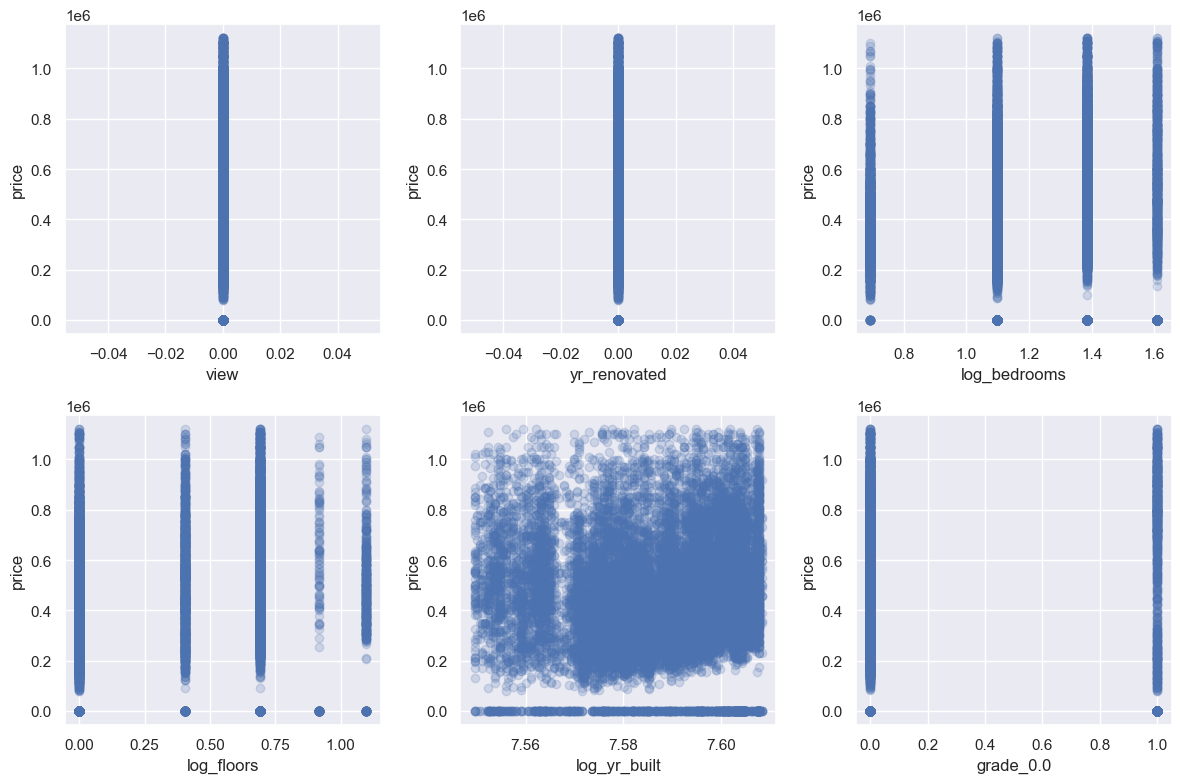

In [74]:
scatterplot_data = X_train_numeric#.drop("grade", axis=1)

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

In [ ]:
X_train_second_model=X_train_numeric.drop(['view','yr_renovated'],axis=1)

In [ ]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

the current model happens to perform better than our baseline model after dropping some of the columns
this happens to be causing a underfitting as the validation score tend to be doing better than our current model train score. 

In [77]:
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

LinAlgError: SVD did not converge

In [ ]:
having a condition number greater than 30 thus a strong multicollinearity

In [ ]:
significant_features =['bedrooms','floors','sqft_living15','sqft_lot15']

In [ ]:
third_model = LinearRegression()
X_train_third_model = x_train[significant_features]

In [ ]:
third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

In [ ]:
removing those features led to the better scores even though they are slightly lower than those of the second model.

"RFE" stands for "recursive feature elimination", meaning that it repeatedly scores the model, finds and removes the feature with the lowest "importance", then scores the model again. If the new score is better than the previous score, it continues removing features until the minimum is reached. "CV" stands for "cross validation" here, and we can use the same splitter we have been using to test our data so far.

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Intresting, so this algorithm says that all our features are the best we could use to fit well with our target.

In [ ]:
best_features=['bedrooms','floors','grade','yr_built','sqft_living15','sqft_lot15']

In [ ]:
X_train_final = x_train[best_features]
X_test_final = x_test[best_features]

In [ ]:
final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_final,y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X_test_final, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)

Below, we display the coefficients and intercept for the final model:

In [ ]:
print(pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

### Investigating linearity

In [ ]:
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

### Investigating Normality

In [ ]:
import scipy.stats as stats

residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### Investigating Multicollinearity (Independence Assumption)
A VIF that is 5 is too high 


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

### Investigating Homoscedasticity


In [ ]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(x_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
### check for underfitting which is a case of the difference between the train and test MSE is not big
    ## unlike for overfitting where there's is a big difference between the train and test MSE.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.tree import plot_tree

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x, y)

plot_tree(tree_reg)

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [ ]:
new_data.head() 

In [ ]:
X=new_data.drop('price',axis=1)
y=new_data['price']
model= sm.OLS(y,X).fit()
model.summary()

In [ ]:
sm.graphics.plot_regress_exog(model,'sqft_living15',fig=plt.figure(figsize=(12,8)))

In [ ]:
# Lets check for our dependent variables distribution
y.hist()

In [ ]:
# Moving on to better understanding our predictors
predictors=new_data.drop('price',axis=1)
target=new_data['price']

In [ ]:
# Perform our multiple linear regression by using sm.add_constant() to add constant term/y_intercept as;
preds=sm.add_constant(predictors)

In [ ]:
model2=sm.OLS(target,preds).fit()
model2.summary()

In [ ]:
# Next we go on to use StandardScaler()to scale our data
ss=StandardScaler()
ss.fit(predictors)
preds_st_scaled=ss.transform(predictors)

In [ ]:
# Now we can fit a LinearRegression to our training data.
lr=LinearRegression()
lr.fit(preds_st_scaled,target)

In [ ]:
# Recover some of the results like;
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
lr.score(preds_st_scaled,target)

In [ ]:
y_hat=lr.predict(preds_st_scaled)
y_hat

In [ ]:
# From here you only have to evaluate our model to see how well it did.
# Let's check for residuals
y_hat=lr.predict(preds_st_scaled)
resid=(target-y_hat)
plt.scatter(x=range(y_hat.shape[0]),y=resid,alpha=0.1);

In [ ]:
# Some of the metrics that can be used to measure the accuacy of our model are r2, MAE,MSE
metrics.r2_score(target,lr.predict(preds_st_scaled))

In [ ]:
# To make sure this metric is properly calibrated,if we put y bar as our prediction, then we should get an r2 score of 0
# If we predict say y bar +1, then we should get a negative r2 score
avg_quality=np.mean(target)
num=len(target)
metrics.r2_score(target,avg_quality*np.ones(num))

In [ ]:
metrics.r2_score(target,(avg_quality+1)*np.ones(num))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

In [ ]:
X=predictors
y=target
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# instatiate our linear regression
lr=LinearRegression()

# fit the model on the training dataset
lr.fit(x_train,y_train)

# check the R2 of the training data
lr.score(x_train,y_train)

In [ ]:
lr.coef_

In [ ]:
# check the performance on the test data
lr.score(x_test,y_test)

In [ ]:
# using a Polynomial model
poly_2 = PolynomialFeatures(4)
X_poly = pd.DataFrame(poly_2.fit_transform(X))
y=target
X_poly.head()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.2,random_state=42)

In [ ]:
lr_poly=LinearRegression()
lr_poly.fit(x_train,y_train)
lr_poly.score(x_train,y_train)

In [ ]:
lr_poly.score(x_test,y_test)

 we can conclude that the polynomial model gives better r2 score than the linear regression model.

To validate on how our model attempts predictions on a more rigorous vadation method we turn to K-Fold cross validation

The K_Fold cross validation expands on the idea of training and test splits by splitting the entire dataset 
   into k equal sections of data

In [ ]:
# lets create a holdout test with
X=predictors
y=target
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Using a say 1. Simple model we see that
simple_model = LinearRegression()
scores_simple = cross_validate(simple_model,x_train,y_train,cv=5,return_train_score=True)
scores_simple

In [ ]:
# checking for the mean and stardard deviations for the train and test scores
np.mean(scores_simple['test_score']),np.std(scores_simple['test_score'])
np.mean(scores_simple['train_score']),np.std(scores_simple['train_score'])


In [ ]:
# go on to fit all the training data by
simple_model.fit(x_train,y_train)
simple_model.score(x_train,y_train)

In [ ]:
#Using a say 2. More Complex model we see that
# Test our polynomial model
poly_3= PolynomialFeatures(3)
X_poly3 = poly_3.fit_transform(x_train)

In [ ]:
model_poly3= LinearRegression()
scores_complex3 = cross_validate(model_poly3,X_poly3,y_train,cv=5,return_train_score=True)
scores_complex3

In [ ]:
# checking for the mean and stardard deviations for the train and test scores
np.mean(scores_complex3['test_score']),np.std(scores_complex3['test_score'])
np.mean(scores_complex3['train_score']),np.std(scores_complex3['train_score'])

In [ ]:
# fit all the training data now
model_poly3.fit(X_poly3,y_train)
model_poly3.score(X_poly3,y_train)

In [ ]:
# we check a 3. Medium Complex model
# we test our polynomial model
poly_2=PolynomialFeatures(2)
X_poly2=poly_2.fit_transform(x_train)

In [ ]:
model_poly2=LinearRegression()
scores_complex2= cross_validate(model_poly2,X_poly2,y_train,cv=5,return_train_score=True)
scores_complex2

In [ ]:
# checking for the mean and stardard deviations for the train and test scores
np.mean(scores_complex2['test_score']),np.std(scores_complex2['test_score'])
np.mean(scores_complex2['train_score']),np.std(scores_complex2['train_score'])

In [ ]:
# lets fit all the training data now
model_poly2.fit(X_poly2,y_train)
model_poly2.score(X_poly2,y_train)


Checking our three models we conclude that the medium_complex model has a more reliable r2 score

In [ ]:
# checking our models against the Holdout Test set
 # we go on to transform the X_test in the same way 
best_model=model_poly2
best_model.score(poly_2.transform(x_test),y_test)

In [ ]:
data_corrs=new_data.corr()['price'].map(abs).sort_values(ascending=False)
data_corrs

In [ ]:
# the larger the correlation, the more we'd expect them to better predict
data_preds=new_data[['sqft_living15','floors','grade','bedrooms']]
data_target=new_data['price']

In [ ]:
lr=LinearRegression()
lr.fit(data_preds,data_target)
lr.score(data_preds,data_target)  # this implies the relationship the columns have on the target

### Recommendations

 some of the aspects that had a great impact on the prices of the houses included;
  'grade','sqft_living15','view','bedrooms','floors'
on the other hand the 'yr_renovated' column had an impact on the prices though not that much directly as the other aspects
using our analysis we can say that for new buyers and sellers of their homes they can major on best identifying some features 
on sqft_living15, number of floors and number of bedrooms to be able to better address on their intended pricing of their 
 homes as these aspects greatly determine the intended price of the house